<font color='darkred'> Unless otherwise noted, **this notebook will not be reviewed or autograded.**</font> You are welcome to use it for scratchwork, but **only the files listed in the exercises will be checked.**

---

# Exercises

For these exercises, add your functions to the *apputil\.py* file. If you like, you're welcome to adjust the *app\.py* file, but it is not required.

**Run the following cell to help with troubleshooting Exercise 2.**

In [1]:
# run this cell first
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']
sns.set_theme(style="whitegrid")
%load_ext autoreload

## Exercise 1

Play [Conway's Game of Life](https://playgameoflife.com/) a few times.

- Click the "Explanation" button at the bottom, and read through/watch the resources.
- "Zoom in" using the "#" slider bar on the lower right, and slide it all the way to the right.
- Set up some initial conditions, and use either the "Start" or "NEXT" button to walk through the process.
- Try to get familiar with how this game works.

## Exercise 2

Modify the `apputil.update_board` function such that it takes in a binary NumPy array, and executes **one** step of Conway's Game of Life for this array.

In [2]:
# run this cell before running the next one
%autoreload 2
from apputil import *

In [4]:
import numpy as np
from IPython.display import clear_output
import time
import seaborn as sns
import matplotlib.pyplot as plt


def update_board(current_board):
    # your code here ...
    updated_board = current_board

    return updated_board


def show_game(game_board, n_steps=10, pause=0.5):
    """
    Show `n_steps` of Conway's Game of Life, given the `update_board` function.

    Parameters
    ----------
    game_board : numpy.ndarray
        A binary array representing the initial starting conditions for Conway's Game of Life. In this array, ` represents a "living" cell and 0 represents a "dead" cell.
    n_steps : int, optional
        Number of game steps to run through, by default 10
    pause : float, optional
        Number of seconds to wait between steps, by default 0.5
    """
    for step in range(n_steps):
        clear_output(wait=True)

        # update board
        game_board = update_board(game_board)

        # show board
        sns.heatmap(game_board, cmap='plasma', cbar=False, square=True)
        plt.title(f'Board State at Step {step + 1}')
        plt.show()

        # wait for the next step
        if step + 1 < n_steps:
            time.sleep(pause)

Run the following cell to troubleshoot your `update_board` function. *Note: the `show_game` function is pre-written for you.*

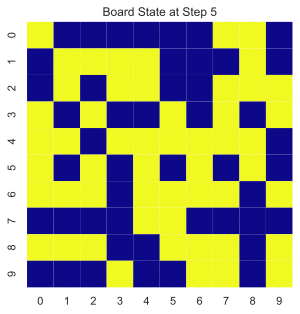

In [3]:
# start with a random game board
game_board = np.random.randint(2, size=(10, 10))

show_game(game_board, n_steps=5, pause=1)

## (Optional) Bonus Exercise 3

Write a *recursive* function that "plays" Conway's Game of Life for a random 10 x 10 NumPy array. I.e., this function should call itself, there should be no input to this function (the initial condition is randomly generated), and the output should be a single array.

## (Optional) Bonus Exercise 4

<font color='darkorange'>For this exercise, **do not look up solutions, and do not use any tools** other than your own understanding of Python thus far.</font>

The [Knapsack Problem](https://en.wikipedia.org/wiki/Knapsack_problem) can be defined as follows:

*Given a set of items, each with a weight and a value, determine which items to include in the collection so that (a) the total weight is less than or equal to a given limit, and (b) the total value is as large as possible.*

Below is one particular solution to this problem. For this exercise,

1. In your own words, describe what this algorithm is doing.
2. Add a comment above *every* line, explaining what that line is doing (in reference to your explanation from #1).

In [ ]:
def knapsack(W, weights, values, full_table=False):

    n = len(values)
    table = [[0 for x in range(W + 1)] for x in range(n + 1)]


    for i in range(n + 1):
        for j in range(W + 1):

            if i == 0 or j == 0:
                table[i][j] = 0

            elif weights[i-1] <= j:
                a_1 = values[i-1]
                diff = j - weights[i-1]
                a_2 = table[i-1][diff]
                a = a_1 + a_2
                b = table[i-1][j]
                table[i][j] = max(a, b)

            else:
                table[i][j] = table[i-1][j]

    if full_table:
        return table

    return table[n][W]

### Optional Challenge

1. Incorporate an *optional* argument `names` (corresponding to `weights` and `values`), and rewrite the function so we know what items to include.
2. Set up the algorithm so it sorts candidate solutions from "best" to "worst" (or vice versa) based on the final value of the knapsack, and create an option to see some alternative options.